<a href="https://colab.research.google.com/github/1sheca/Basic-AppDevelopment-Mini-projects-/blob/main/Wheat_Crop_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gdown

# Define the URL of the file on Google Drive
url = 'https://drive.google.com/uc?id=1pXos8ImQH2heMeIlXHIGcBSt9smkUh4d'

# Define the name of the file to save locally
output = '/content/wheat_dataset.zip'

# Download the file from the URL
gdown.download(url, output, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1pXos8ImQH2heMeIlXHIGcBSt9smkUh4d
From (redirected): https://drive.google.com/uc?id=1pXos8ImQH2heMeIlXHIGcBSt9smkUh4d&confirm=t&uuid=da7f130e-8fee-4038-953a-4adc8b4f927d
To: /content/wheat_dataset.zip
100%|██████████| 508M/508M [00:09<00:00, 52.2MB/s]


'/content/wheat_dataset.zip'

In [ ]:
import zipfile
import os

# Define the path to the downloaded zip file
zip_file_path = '/content/wheat_dataset.zip'

# Define the directory where you want to extract the contents of the zip file
extracted_dir_path = '/content/wheat_dataset'

# Create the directory if it doesn't exist
os.makedirs(extracted_dir_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

# Check the contents of the extracted directory
print("Contents of the extracted directory:")
print(os.listdir(extracted_dir_path))


Contents of the extracted directory:
['wheat_data', '__MACOSX']


Class Names:
['Yellow_rust', 'Brown_rust', 'Healthy']


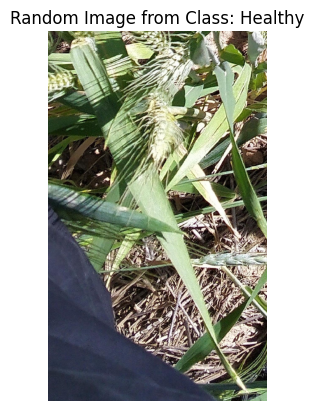

In [ ]:
import os
import random
import matplotlib.pyplot as plt

# Define the path to the 'wheat_data' directory
wheat_data_dir = os.path.join(extracted_dir_path, 'wheat_data')

# Filter out non-directory items
class_names = [item for item in os.listdir(wheat_data_dir) if os.path.isdir(os.path.join(wheat_data_dir, item))]

# Print the filtered class names
print("Class Names:")
print(class_names)

# Choose a random class
random_class = random.choice(class_names)

# Get the path to the directory of the random class
class_dir = os.path.join(wheat_data_dir, random_class)

# List all images in the chosen class directory
image_names = os.listdir(class_dir)

# Choose a random image
random_image_name = random.choice(image_names)

# Load and display the random image
random_image_path = os.path.join(class_dir, random_image_name)
random_image = plt.imread(random_image_path)
plt.imshow(random_image)
plt.title(f"Random Image from Class: {random_class}")
plt.axis('off')
plt.show()


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the directory path where the dataset is located
dataset_dir = '/content/wheat_dataset/wheat_data'

# Define the input shape for the model
input_shape = (224, 224)  # Adjust according to the input size expected by the pre-trained model

# Define batch size
batch_size = 32

# Create ImageDataGenerator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Splitting the data into training and validation sets
)

# Load and preprocess the training set with data augmentation
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=input_shape,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Specify subset as training set
)

# Load and preprocess the validation set without data augmentation
val_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=input_shape,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Specify subset as validation set
)

# Display class indices
print("Class Indices:")
print(train_generator.class_indices)


Found 2944 images belonging to 3 classes.
Found 735 images belonging to 3 classes.
Class Indices:
{'Brown_rust': 0, 'Healthy': 1, 'Yellow_rust': 2}


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Define the input shape for the model
input_shape = (224, 224, 3)  # Adjust according to the input size expected by the pre-trained model

# Load the pre-trained VGG16 model (you can choose other pre-trained models as well)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the weights of the pre-trained layers so they are not updated during training
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)  # Add a dense layer with ReLU activation
predictions = Dense(3, activation='softmax')(x)  # Add a final dense layer with softmax activation for classification

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


58889256/58889256 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

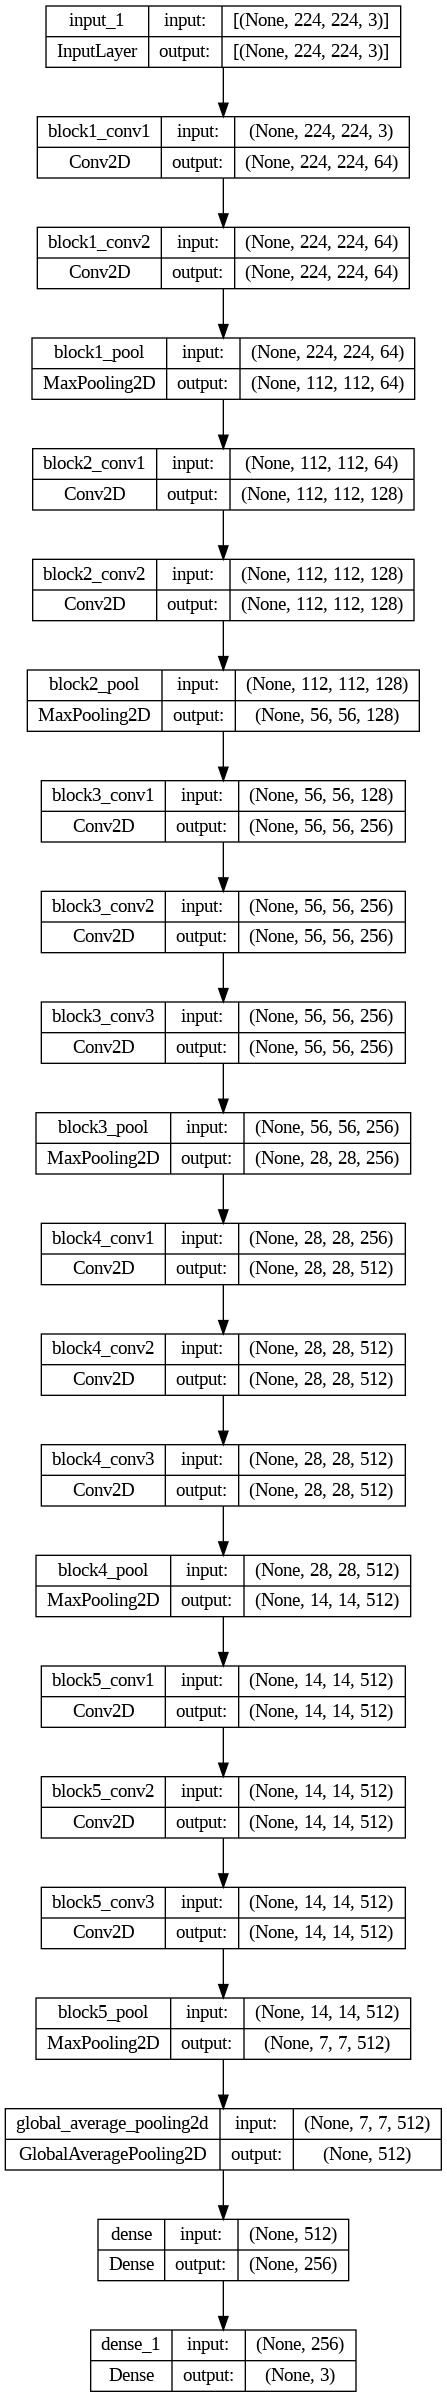

In [ ]:
from tensorflow.keras.utils import plot_model

# Visualize the model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


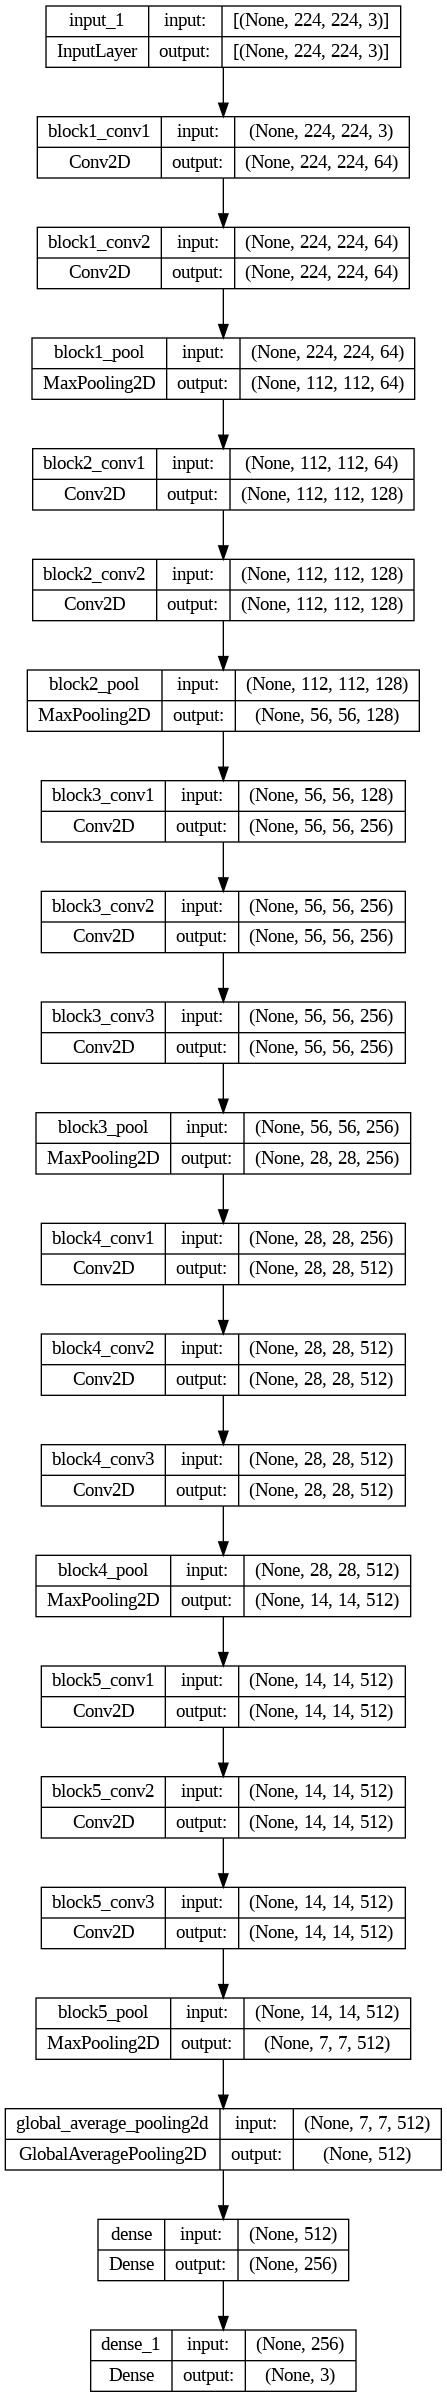

In [ ]:
from IPython.display import Image

# Display the model architecture in the notebook
Image(filename='model_architecture.png')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)

# Initialize variables
epochs = 0
max_epochs = 3  # Number of "epochs" to train for
best_val_loss = float('inf')

# Train the model
while epochs < max_epochs:
    # Train for one "epoch"
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=1,  # Train for one epoch only
        validation_data=val_generator,
        validation_steps=val_generator.samples // batch_size,
        callbacks=[early_stopping, model_checkpoint],
        verbose=1  # Set verbose to 1 to print training progress
    )

    # Update epoch count
    epochs += 1

    # Check if validation loss has improved
    val_loss = history.history['val_loss'][0]
    if val_loss < best_val_loss:
        best_val_loss = val_loss
    else:
        break  # Stop training if validation loss stops improving


13/92 [===>..........................] - ETA: 27:31 - loss: 0.2189 - accuracy: 0.9111

In [ ]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Save the trained model
model.save('final_model.h5')
print("Trained model saved as 'final_model.h5'")

In [ ]:
#Generate Classification Report: Use scikit-learn's
#classification_report function to generate a detailed classification report,
#including precision, recall, F1-score, and support for each class.

In [ ]:
from sklearn.metrics import classification_report

# Generate predictions for the test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels for the test set
true_labels = test_generator.classes

# Generate classification report
report = classification_report(true_labels, y_pred_classes, target_names=class_names)
print("Classification Report:\n", report)

In [ ]:
#Visualize Model Performance: Plot training and validation loss and
#accuracy curves over epochs to visualize the model's performance during training.

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Visualize Confusion Matrix: Plot the confusion matrix to visualize the model's performance in predicting each class.

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(true_labels, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()